In [2]:
#importing required modules
import pandas as pd
import seaborn as sbn
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#loading the dataset
data = pd.read_csv('BankNote_Authentication.csv')

In [11]:
#Exploratory data analysis
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
data.shape

(1372, 5)

<AxesSubplot:xlabel='class', ylabel='count'>

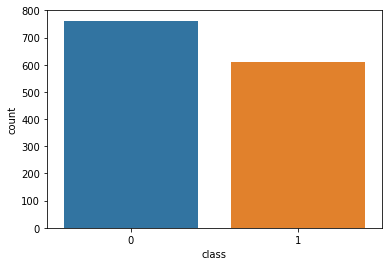

In [7]:
sbn.countplot(x=data['class'])
#we can see that the data is slighted skewed towards 0

In [ ]:
#as we are going to implement random forest algorithm, the outliers and coorelation between variables #are not very important

In [12]:
#declaring the dependant and independant variables
x = data.loc[: ,data.columns != 'class']
y = data['class']

In [9]:
#splitting the dataset in the raio of 80:20:20 for training, validation and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=227)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=234)

#building the classifier and fitting the training data
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

#predicting the valid and test sets
valid_prediction = classifier.predict(x_valid)
test_prediction = classifier.predict(x_test)

print("Valid accuracy:",accuracy_score(y_valid, valid_prediction)*100)
print("Test accuracy:",accuracy_score(y_test, test_prediction)*100)

Valid accuracy: 100.0
Test accuracy: 99.63636363636364


In [10]:
#storing the classifier using pickle to use in the web app deployed using streamlit
pickle_out = open('classifier.pkl','wb')
pickle.dump(classifier, pickle_out)
pickle_out.close

<function BufferedWriter.close>